<a href="https://colab.research.google.com/github/rahiakela/mlops-research-and-practice/blob/main/machine-learning-for-streaming-data/02_online_anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setup

In [ ]:
!pip install river

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import random

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from river import anomaly

import matplotlib.pyplot as plt

##Outliers

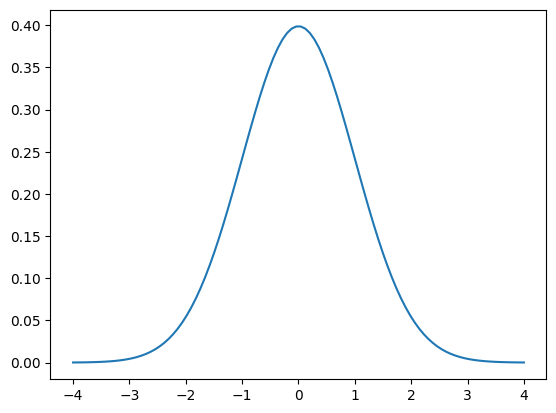

In [5]:
x = np.linspace(-4, 4, 100)
plt.plot(x, stats.norm.pdf(x, 0, 1))

(array([1.800000e+01, 9.300000e+01, 4.620000e+02, 2.051000e+03,
        8.434000e+03, 2.927900e+04, 8.629300e+04, 2.139140e+05,
        4.492860e+05, 7.969410e+05, 1.195707e+06, 1.517202e+06,
        1.627119e+06, 1.480876e+06, 1.139107e+06, 7.420530e+05,
        4.096620e+05, 1.914850e+05, 7.555700e+04, 2.522400e+04,
        7.124000e+03, 1.687000e+03, 3.510000e+02, 6.500000e+01,
        1.000000e+01]),
 array([-5.11142337, -4.70017507, -4.28892678, -3.87767848, -3.46643019,
        -3.0551819 , -2.6439336 , -2.23268531, -1.82143701, -1.41018872,
        -0.99894043, -0.58769213, -0.17644384,  0.23480446,  0.64605275,
         1.05730105,  1.46854934,  1.87979763,  2.29104593,  2.70229422,
         3.11354252,  3.52479081,  3.9360391 ,  4.3472874 ,  4.75853569,
         5.16978399]),
 <BarContainer object of 25 artists>)

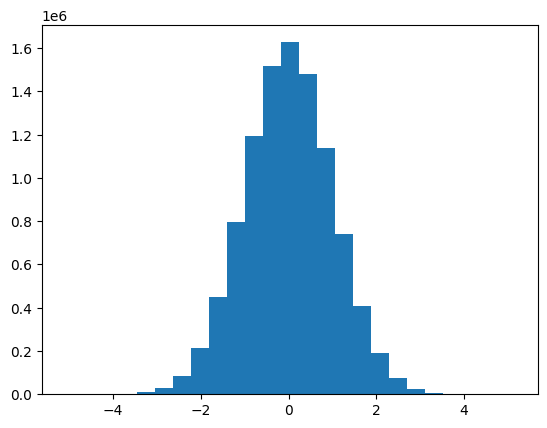

In [6]:
# Let's see how a sample of 10 million observations is drawn from a standard normal distribution
data = np.random.normal(size=10000000)
plt.hist(data, bins=25)

In [7]:
# Now, let's see what the highest and lowest values
min(data), max(data)

(-5.111423366866756, 5.169783987294494)

##Model evaluation

In [ ]:
# add a stratified train test split
train_data, test_data = train_test_split(data, stratify=data["setosa"])

In [ ]:
model = linear_model.LogisticRegression()
correct = []

for i, row in train_data.sample(frac=1).iterrows():
  X = row[["sepal_length", "sepal_width", "petal_length", "petal_width"]]

  X = X.to_dict()
  y = row["setosa"]

  model.predict_one(X)
  correct.append(y == model.predict_one(X))
  model.learn_one(X, y)

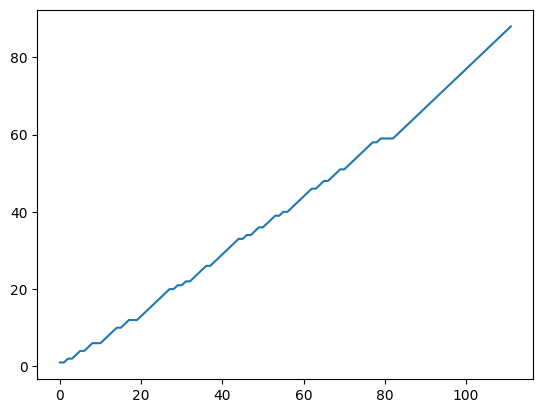

In [ ]:
# Let's plot the cumulative sum of correct scores over time
plt.plot(np.cumsum(correct))

In [ ]:
# Finally, let's compute the accuracy on the test score
pred = model.predict_many(test_data[["sepal_length", "sepal_width", "petal_length", "petal_width"]])
accuracy_score(test_data["setosa"], pred)

1.0

##Multiclass classifier

In [ ]:
# add a stratified train test split
train_data, test_data = train_test_split(data, stratify=data["class"])

In [ ]:
model2 = multiclass.OneVsRestClassifier(linear_model.LogisticRegression())
correct = []

for i, row in train_data.sample(frac=1).iterrows():
  X = row[["sepal_length", "sepal_width", "petal_length", "petal_width"]]

  X = X.to_dict()
  y = row["class"]

  model2.predict_one(X)
  correct.append(y == model2.predict_one(X))
  model2.learn_one(X, y)

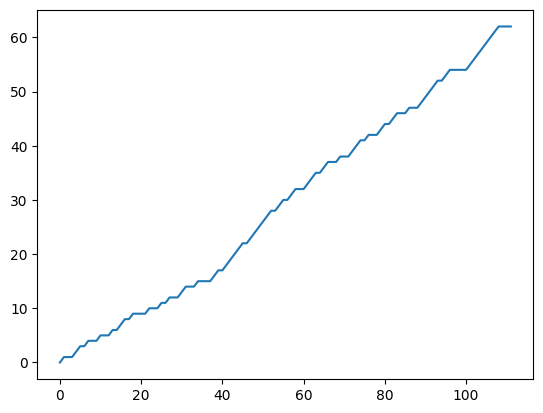

In [ ]:
plt.plot(np.cumsum(correct))

In [ ]:
model2.predict_many(test_data[["sepal_length", "sepal_width", "petal_length", "petal_width"]])

18         Iris-setosa
149    Iris-versicolor
55     Iris-versicolor
8          Iris-setosa
4          Iris-setosa
125    Iris-versicolor
50     Iris-versicolor
107    Iris-versicolor
12         Iris-setosa
81     Iris-versicolor
67     Iris-versicolor
76     Iris-versicolor
44         Iris-setosa
3          Iris-setosa
13         Iris-setosa
7          Iris-setosa
63     Iris-versicolor
143    Iris-versicolor
109    Iris-versicolor
75     Iris-versicolor
79     Iris-versicolor
127    Iris-versicolor
128    Iris-versicolor
146    Iris-versicolor
51     Iris-versicolor
117    Iris-versicolor
122    Iris-versicolor
2          Iris-setosa
97     Iris-versicolor
136    Iris-versicolor
58     Iris-versicolor
29         Iris-setosa
93     Iris-versicolor
49         Iris-setosa
145    Iris-versicolor
0          Iris-setosa
54     Iris-versicolor
40         Iris-setosa
dtype: object

In [ ]:
pred = model2.predict_many(test_data[["sepal_length", "sepal_width", "petal_length", "petal_width"]])
accuracy_score(test_data["class"], pred)

0.6842105263157895